In [ ]:
from tensorflow.keras.datasets import imdb

max_features = 10000 #해당 데이터셋에서 빈도수 기준 상위 10000개 단어만 사용
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
from tensorflow.keras.preprocessing import sequence

max_len = 500 # 문서의 길이 500으로 통일

# 최대 길이로 패딩 진행
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [ ]:
print(x_train.shape)

(25000, 500)


In [ ]:
print(y_train.shape)

(25000,)


In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print(x_test.shape)

(25000, 500)


In [ ]:
# 원 핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

y_train_one_hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

#모델 구축
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len)) # 텍스트 데이터를 임베딩 벡터로 - (500 x 128 차원)
model.add(layers.Conv1D(32, 7, activation='relu')) # 필터수 : 32 / 필터 세로 : 7 / 가로는 128로 고정
model.add(layers.MaxPool1D(5))  #5 : 풀링 필터의 세로의 길이 / 가로 길이는 1로 고정임 /  stride는 자동으로 5로 고정됨
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 98, 32)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                100384    
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                      

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc']) # 분류 문제이기 때문에 크로스 엔트로피로 설정하고, RMSprop 옵티마이저를 사용한다.

history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 67s 418ms/step - loss: 0.6684 - acc: 0.5719 - val_loss: 0.5658 - val_acc: 0.7128
Epoch 2/10
157/157 [==============================] - 64s 409ms/step - loss: 0.3767 - acc: 0.8334 - val_loss: 0.3699 - val_acc: 0.8422
Epoch 3/10
157/157 [==============================] - 69s 439ms/step - loss: 0.2566 - acc: 0.8984 - val_loss: 0.2858 - val_acc: 0.8804
Epoch 4/10
157/157 [==============================] - 65s 414ms/step - loss: 0.1987 - acc: 0.9231 - val_loss: 0.4469 - val_acc: 0.8278
Epoch 5/10
157/157 [==============================] - 64s 410ms/step - loss: 0.1574 - acc: 0.9425 - val_loss: 0.2987 - val_acc: 0.8844
Epoch 6/10
157/157 [==============================] - 66s 419ms/step - loss: 0.1162 - acc: 0.9589 - val_loss: 0.3330 - val_acc: 0.8812
Epoch 7/10
157/157 [==============================] - 65s 416ms/step - loss: 0.0812 - acc: 0.9732 - val_loss: 0.3813 - val_acc: 0.8768
Epoch 8/10
157/157 [==============================] - 6

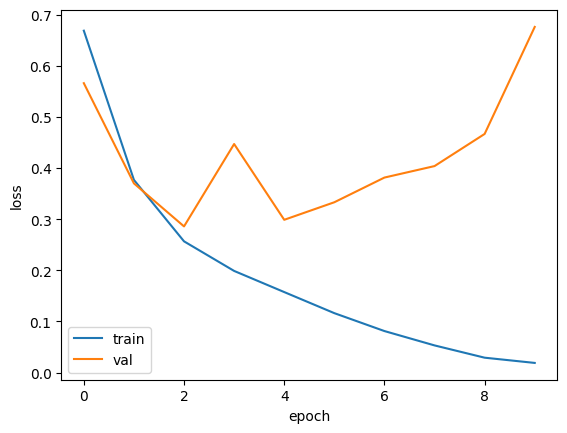

782/782 [==============================] - 20s 26ms/step - loss: 0.7456 - acc: 0.8384


0.8383600115776062

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

test_acc